<div class='bar_title'></div>

*Data Driven Decisions in Practice (D3IP): Urban Analytics*

# Case Study: Predicting AirBnB Accomodation Prices

Gunther Gust & Nikolai Stein

Data Driven Decisions (D3) Group <br>
Center for Artificial Intelligence & Data Science <br>



<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

Complete the case study outlined by the steps below. Remember to always comment your code and document your findings so that your notebook is easy to read and follow! (Apart from correctness, the style of the notebook will also affect your grade!)



# PART 1: Data Loading and Exploratory Data Analysis

Insructions:

* Load the `airbnb.geojson` file into this notebook as a geodataframe
* Explore the content of each column of the geodataframe using methods of your choice (descriptive statistics, plots etc.). Describe your findings in the markdown cells.
* Create a plot that displays the location of the airbnb listings and the price. Add a basemap of San Diego to the plot.

In [26]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
import seaborn as sns
import contextily as cx

In [27]:
file_path = '/workspaces/case-study-1-urban-analytics-barculaamula/airbnb_listings.geojson'
gdf = gpd.read_file(file_path)
print(gdf.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  price  \
0               0         1         0             0  425.0   
1               1         0         0             0  205.0   
2               0         0         0             0   99.0   
3               0         1         0             0   72.0   
4               0         1         0             0   55.0   

                      geometry  
0  POINT (-117.12971 32.75399)  
1  POINT (-117.25253 32.78421)  
2  POINT (-117.14121 32.75327)  
3  POINT (-117.15269

In [28]:
gdf.describe()

,accommodates,bathrooms,bedrooms,beds,rt_Private_room,rt_Shared_room,pg_Condominium,pg_House,pg_Other,pg_Townhouse,price
count,6110.000000,6110.000000,6110.000000,6110.000000,6110.000000,6110.000000,6110.000000,6110.00000,6110.000000,6110.000000,6110.000000
mean,4.220786,1.475286,1.589198,2.196399,0.298363,0.027987,0.090998,0.42144,0.087234,0.033879,215.967594
std,2.840703,0.863803,1.136234,1.712917,0.457577,0.164949,0.287630,0.49383,0.282201,0.180932,277.549832
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,18.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,85.000000
50%,4.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,139.000000
75%,6.000000,2.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,250.000000
max,21.000000,10.000000,10.000000,16.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4900.000000


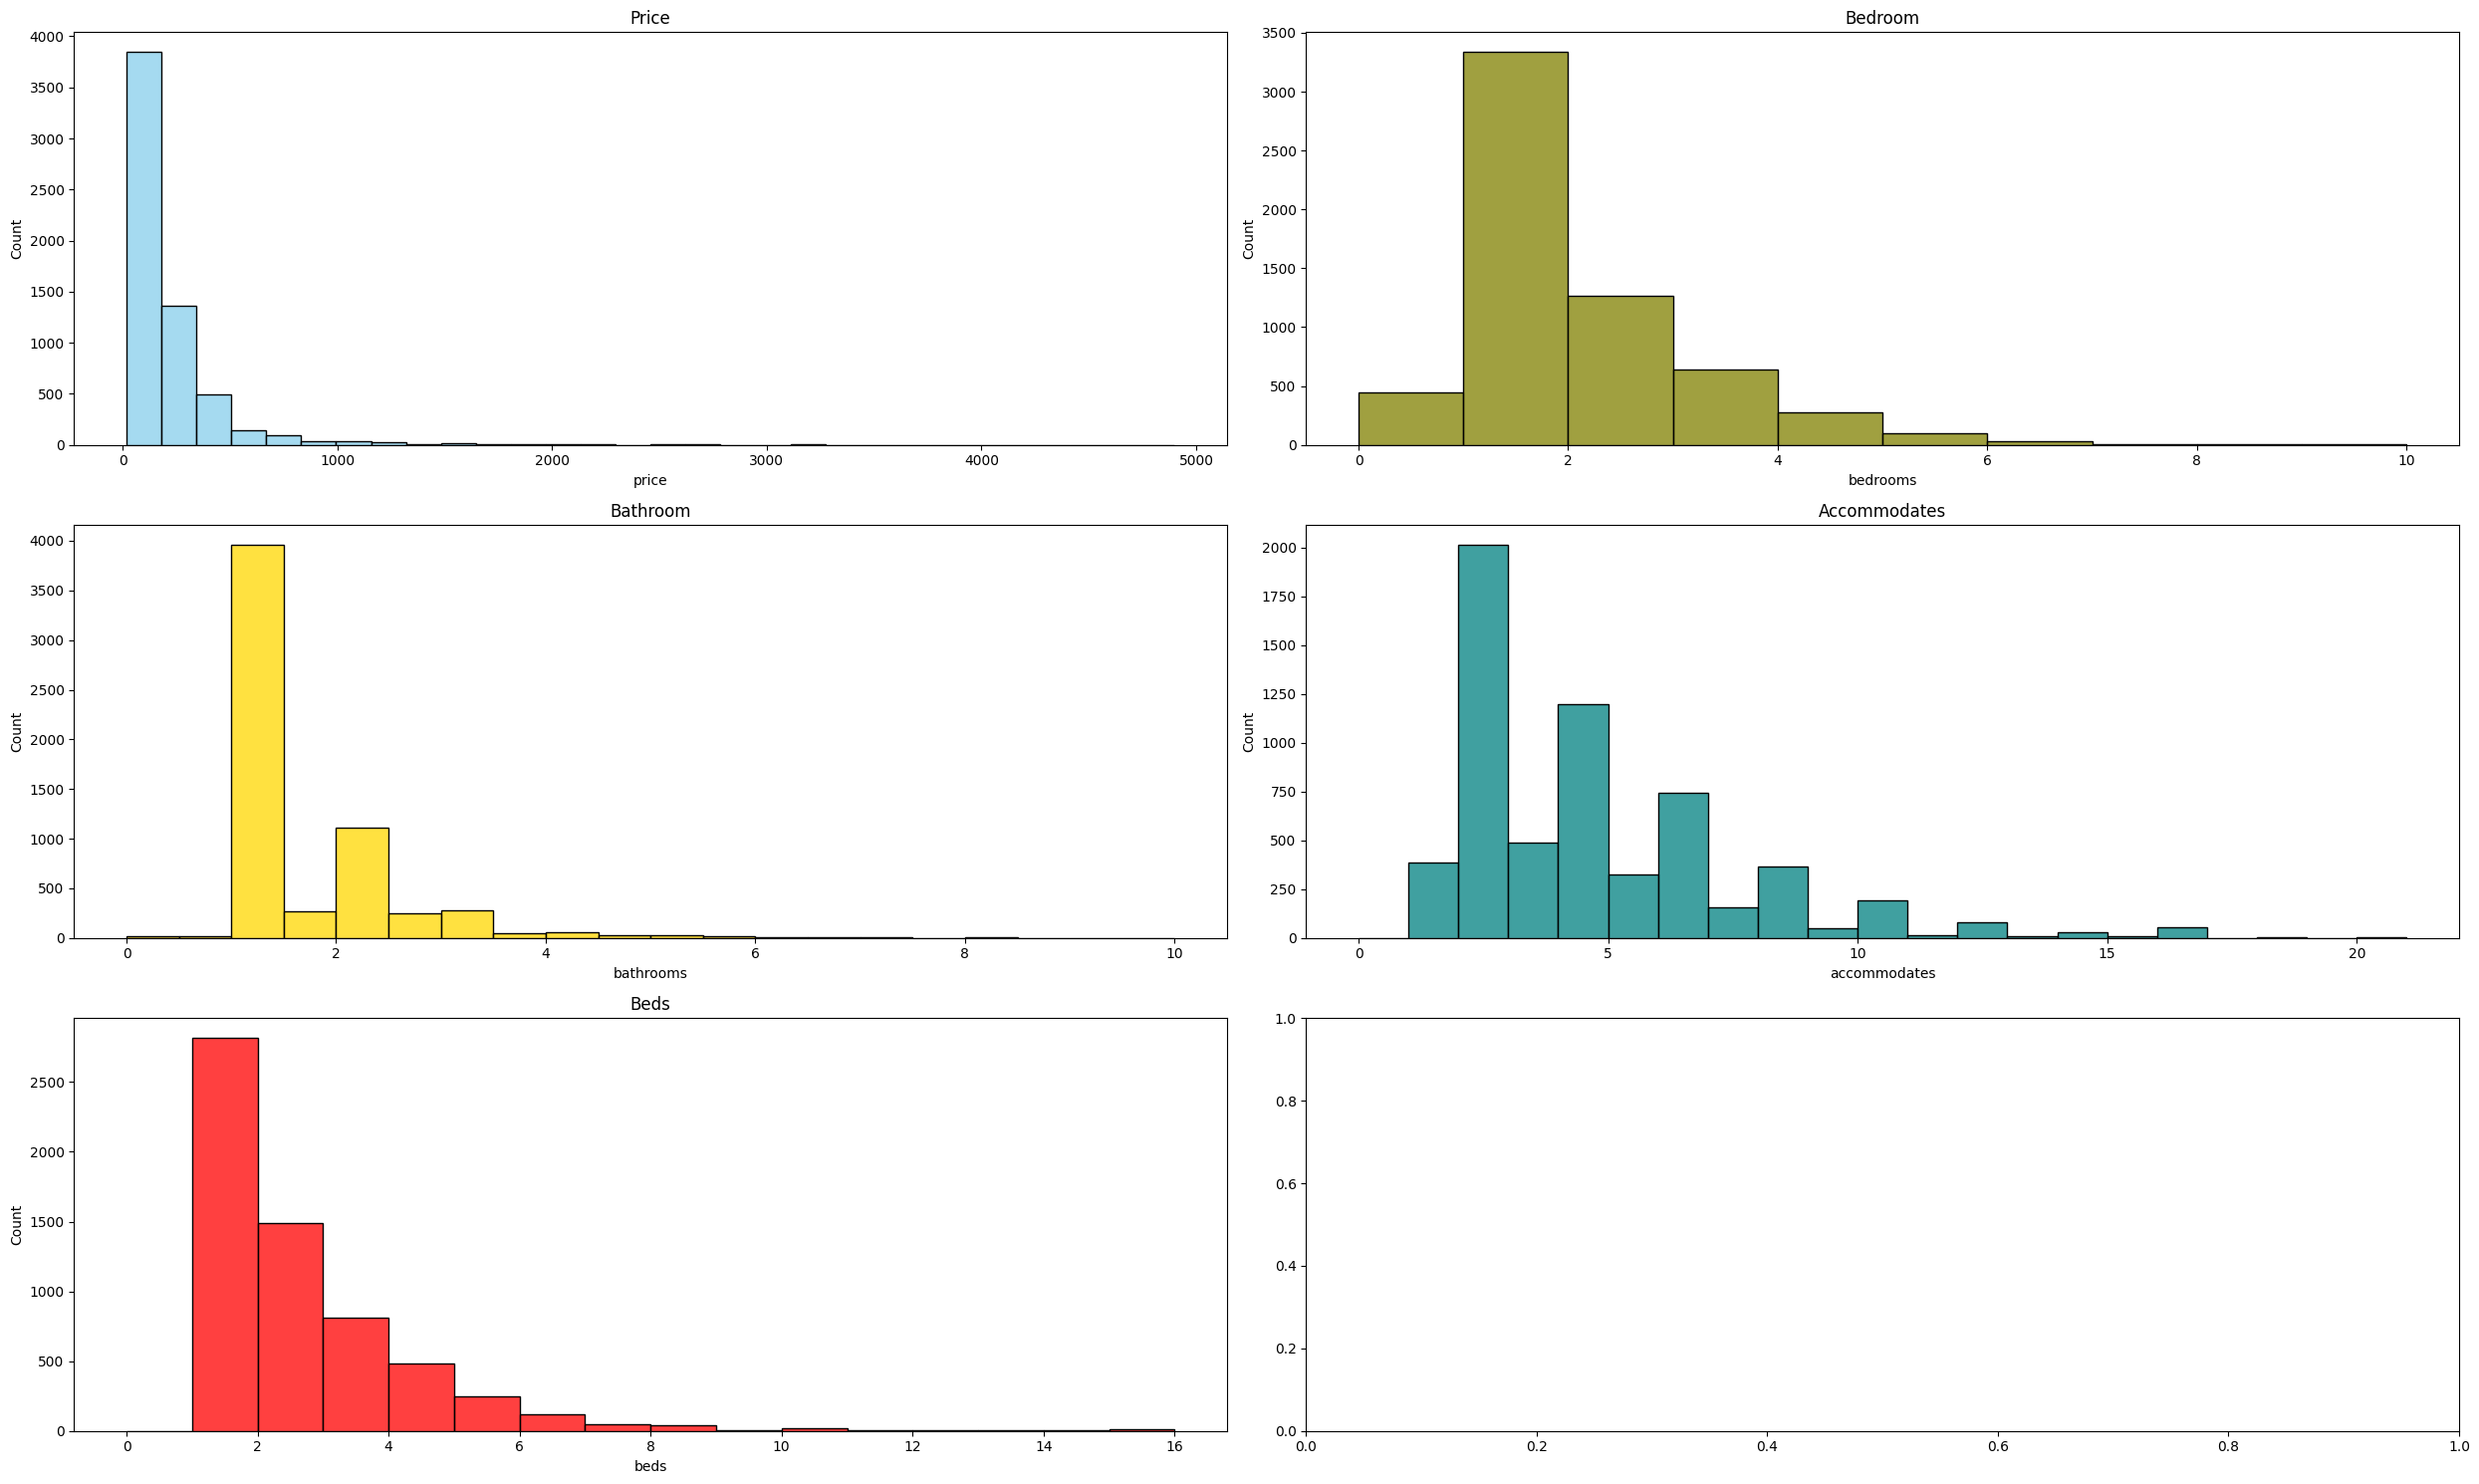

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 15))
sns.histplot(gdf['price'], bins=30, ax=axes[0, 0], color='skyblue').set_title('Price')
sns.histplot(gdf['bedrooms'], bins=np.arange(0, gdf['bedrooms'].max()+1, 1), ax=axes[0, 1], color='olive').set_title('Bedroom')
sns.histplot(gdf['bathrooms'], bins=np.arange(0, gdf['bathrooms'].max()+0.5, 0.5), ax=axes[1, 0], color='gold').set_title('Bathroom')
sns.histplot(gdf['accommodates'], bins=np.arange(0, gdf['accommodates'].max()+1, 1), ax=axes[1, 1], color='teal').set_title('Accommodates')
sns.histplot(gdf['beds'], bins=np.arange(0, gdf['beds'].max()+1, 1), ax=axes[2, 0], color='red').set_title('Beds')
plt.tight_layout()

/tmp/ipykernel_92857/1033449288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gdf, y='rt_Private_room', ax=axes[0], palette='Set2').set_title('Private Room Distribution')
/tmp/ipykernel_92857/1033449288.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gdf, y='pg_House', ax=axes[1], palette='Set1').set_title('Property Type Distribution')


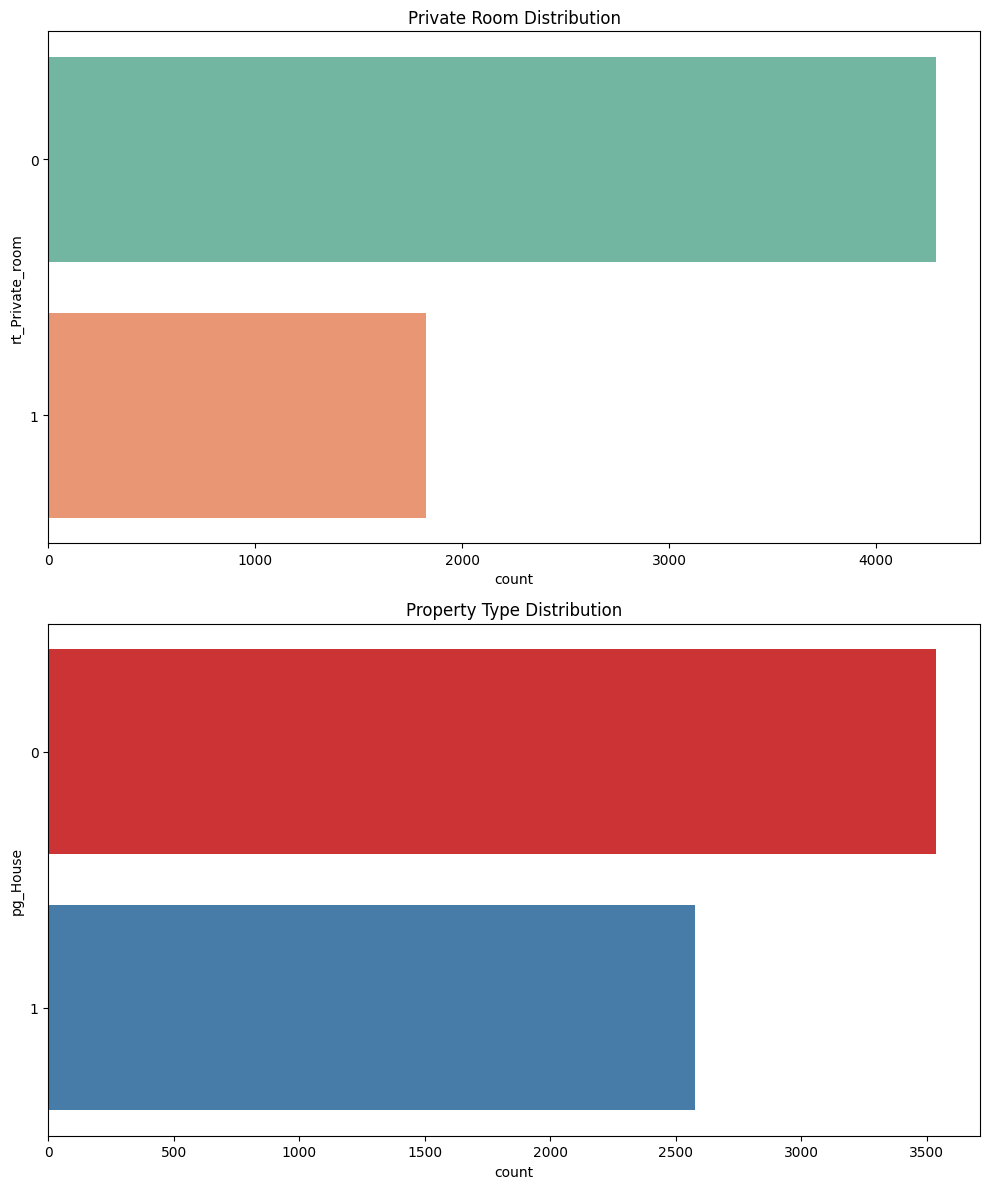

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
sns.countplot(data=gdf, y='rt_Private_room', ax=axes[0], palette='Set2').set_title('Private Room Distribution')
sns.countplot(data=gdf, y='pg_House', ax=axes[1], palette='Set1').set_title('Property Type Distribution')
plt.tight_layout()

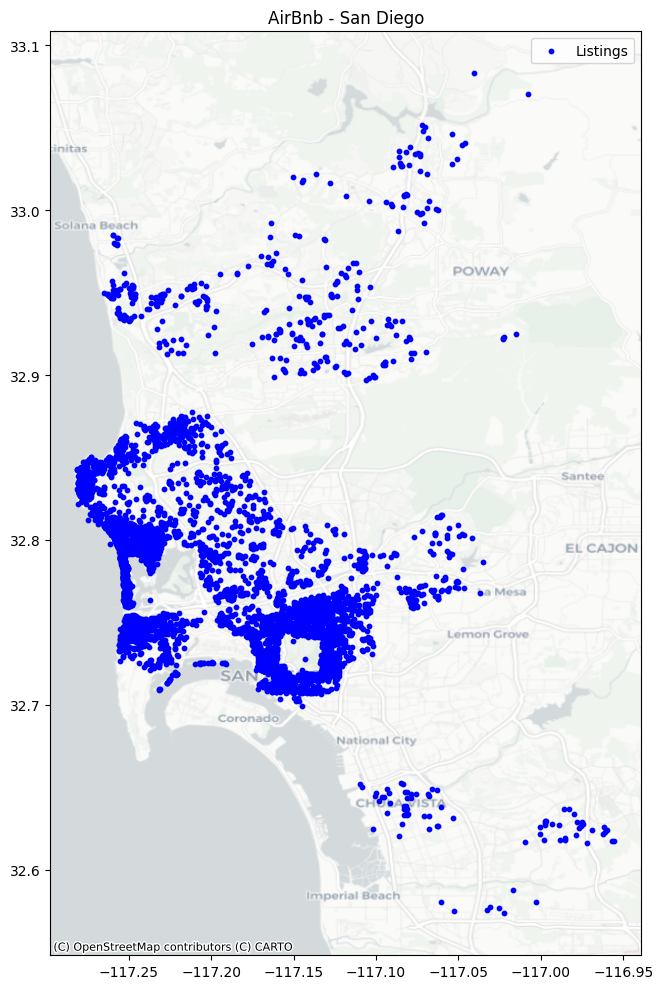

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=10, color='blue', marker='o', label='Listings', legend_kwds={'label': "Listing Price",
                      'orientation': "horizontal"})
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)
ax.set_title('AirBnb - San Diego')
plt.legend()
plt.tight_layout()


These are the variables you should analyze and later use to predict the `price`:

In [32]:

variable_names = [
    "accommodates",  # Number of people it accommodates
    "bathrooms",  # Number of bathrooms
    "bedrooms",  # Number of bedrooms
    "beds",  # Number of beds
    # Below are binary variables, 1 True, 0 False
    "rt_Private_room",  # Room type: private room
    "rt_Shared_room",  # Room type: shared room
    "pg_Condominium",  # Property group: condo
    "pg_House",  # Property group: house
    "pg_Other",  # Property group: other
    "pg_Townhouse",  # Property group: townhouse
]

# PART 2 Feature Engineering: Get points-of-interest (POIs) and prepare them

Instructions:

* Use the method `features_from_address()` of osmnx to download POIs of the type `amenity` (select the types of amenities to include from this list here: https://wiki.openstreetmap.org/wiki/Key:amenity)
* Pay attention to set the `dist` parameter to an appropiate value 

In [33]:
import osmnx as ox

In [34]:
address = "San Diego, California, USA"
distance = 20000
tags = {'amenity': [
    "bar", "cafe", "food_court", "pub", "restaurant", "bicycle_rental", "boat_rental", "bus_station", "car_rental", 
    "car_sharing", "charging_station", "parking", "arts_centre", "community_centre", "conference_centre", "place_of_worship"
    "events_venue", "nightclub", "planetarium", "theatre", "gym", "marketplace", "swimming_pool", "aquarium", "casino", "biergarten"
    "museum", "art_gallery", "attraction", "beach_resort", "gallery", "heritage", "park", "resort", "sauna", "waterfall", "zoo"
]}

pois = ox.features_from_address(address, tags=tags, dist=distance)

In [35]:
pois.head()

barrier                     geometry     amenity  \
element_type osmid                                                        
node         273607070     NaN  POINT (-117.22469 32.86232)  restaurant   
             273607369     NaN  POINT (-117.22469 32.86205)  restaurant   
             274193511     NaN  POINT (-117.18378 32.82139)  restaurant   
             274358074     NaN  POINT (-117.22472 32.86277)        cafe   
             274363369     NaN  POINT (-117.17386 32.83364)  restaurant   

                        cuisine              name diet:vegan diet:vegetarian  \
element_type osmid                                                             
node         273607070  italian          Leucadia        NaN             NaN   
             273607369    sushi         Subarashi        NaN             NaN   
             274193511     thai     Thai Time III        yes             yes   
             274358074      tea   Tapioca Express        NaN             NaN   
             274363369      NaN  Sipz Fusion Cafe       only             NaN   

                           created_by operator operator:wikidata  ...  \
element_type osmid                                                ...   
node         273607070            NaN      NaN               NaN  ...   
             273607369            NaN      NaN               NaN  ...   
             274193511            NaN      NaN               NaN  ...   
             274358074  Potlatch 0.9c      NaN               NaN  ...   
             274363369            NaN      NaN               NaN  ...   

                       location parking:orientation name:signed male  \
element_type osmid                                                     
node         273607070      NaN                 NaN         NaN  NaN   
             273607369      NaN                 NaN         NaN  NaN   
             274193511      NaN                 NaN         NaN  NaN   
             274358074      NaN                 NaN         NaN  NaN   
             274363369      NaN                 NaN         NaN  NaN   

                       diet:local charging_station caravans industrial ways  \
element_type osmid                                                            
node         273607070        NaN              NaN      NaN        NaN  NaN   
             273607369        NaN              NaN      NaN        NaN  NaN   
             274193511        NaN              NaN      NaN        NaN  NaN   
             274358074        NaN              NaN      NaN        NaN  NaN   
             274363369        NaN              NaN      NaN        NaN  NaN   

                       year_of_construction  
element_type osmid                           
node         273607070                  NaN  
             273607369                  NaN  
             274193511                  NaN  
             274358074                  NaN  
             274363369                  NaN  

[5 rows x 319 columns]

Data cleaning: The resulting `pois` geodataframe may have a composite row index. In addition, some POIs may be of a strange element_type. You can use the following code to eliminate these issues.

In [36]:
# Clean the POI data
pois.reset_index(inplace=True) # reset the index of the data frame
pois = pois[pois.element_type=="node"] # eliminate all POIs that are not of the type "node"
pois.head() # check the results

,element_type,osmid,barrier,geometry,amenity,cuisine,name,diet:vegan,diet:vegetarian,created_by,...,location,parking:orientation,name:signed,male,diet:local,charging_station,caravans,industrial,ways,year_of_construction
0,node,273607070,NaN,POINT (-117.22469 32.86232),restaurant,italian,Leucadia,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,273607369,NaN,POINT (-117.22469 32.86205),restaurant,sushi,Subarashi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node,274193511,NaN,POINT (-117.18378 32.82139),restaurant,thai,Thai Time III,yes,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,node,274358074,NaN,POINT (-117.22472 32.86277),cafe,tea,Tapioca Express,NaN,NaN,Potlatch 0.9c,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,node,274363369,NaN,POINT (-117.17386 32.83364),restaurant,NaN,Sipz Fusion Cafe,only,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Instructions:
* Plot the POIs spatially (use again a background map of San Diego)
* When you use POIs of different amenity types, color the POIs differently

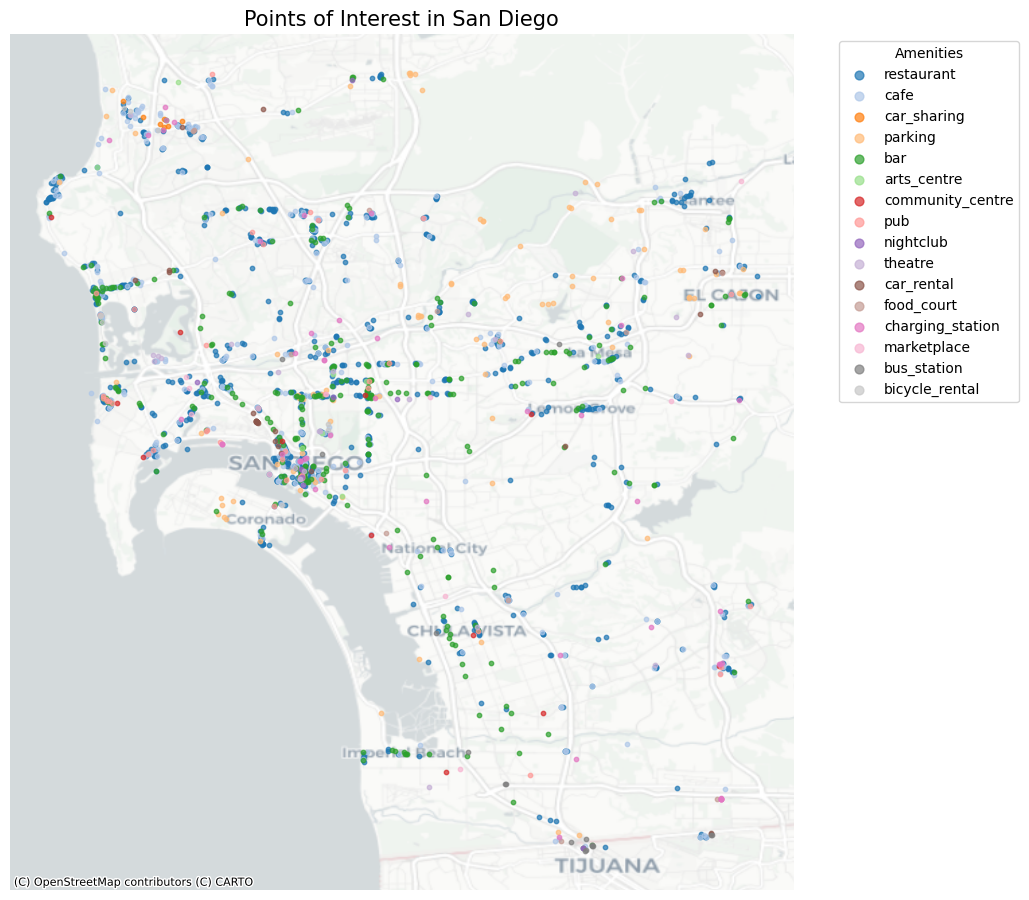

In [37]:
gdf_pois = gpd.GeoDataFrame(pois, geometry=gpd.points_from_xy(pois.geometry.x, pois.geometry.y))

fig, ax = plt.subplots(figsize=(10, 10))

amenity_types = gdf_pois['amenity'].unique()
colors = plt.cm.tab20(range(len(amenity_types)))  

for amenity, color in zip(amenity_types, colors):
    subset = gdf_pois[gdf_pois['amenity'] == amenity]
    subset.plot(ax=ax, markersize=10, color=color, label=amenity, alpha=0.7)

cx.add_basemap(ax, crs=gdf_pois.crs.to_string(), source=cx.providers.CartoDB.Positron)

plt.legend(markerscale=2, bbox_to_anchor=(1.05, 1), loc='upper left', title='Amenities')

ax.set_title('Points of Interest in San Diego', fontsize=15)

ax.set_axis_off()

plt.tight_layout()
plt.show()

For each POI amenity type, create a kernel density estimation (KDE):
* Convert the `geometry` of the POI into a suitable coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Feed the resulting coordinates into the `gaussian_kde` function and estimate the function
* Also convert the `geometry` of the Airbnb listings into the coordinate data format (you may use the provided function `create_coordinate_array` for this)
* Using the converted Airbnb geometries, compute the KDE for the locations of the Airbnb listings
* Add the KDE estimate as additional columns to your original airbnb geodataframe

In [38]:
from scipy.stats import gaussian_kde

In [39]:
# helper function to convert the geometries into a suitable coordinate format for the KDE
def create_coordinate_array(geometries): 
    x_values = []
    y_values = []

# Iterate through each row in the GeoDataFrame
    for multipoint in geometries:
        # Ensure the geometry is indeed MultiPoint; if it's just a single Point, wrap it in a list
        points = list(multipoint.geoms) if hasattr(multipoint, "geoms") else [multipoint]
        
        # For each Point in the MultiPoint, extract x and y values
        for point in points:
            x_values.append(point.x)
            y_values.append(point.y)

    # Optionally, convert the lists to numpy arrays for further processing
    x_values = np.array(x_values)
    y_values = np.array(y_values)

    # Rearrange data to create a 2D array of x and y coordinates
    xy = np.vstack([x_values,y_values])

    return xy


# Example Usage for the Airbnb geodataframe
airbnb_array = create_coordinate_array(gdf.geometry)

In [40]:
for amenity in gdf_pois['amenity'].unique():
    amenity_pois = gdf_pois[gdf_pois['amenity'] == amenity]
    
    amenity_array = create_coordinate_array(amenity_pois.geometry)
    
    kde = gaussian_kde(amenity_array)
    
    kde_values = kde(airbnb_array)
    
    gdf[f'kde_{amenity}'] = kde_values

print(gdf.head())

   accommodates  bathrooms  bedrooms  beds  rt_Private_room  rt_Shared_room  \
0             5        2.0       2.0   2.0                0               0   
1             6        1.0       2.0   4.0                0               0   
2             2        1.0       1.0   1.0                1               0   
3             2        1.0       1.0   1.0                1               0   
4             2        1.0       1.0   1.0                1               0   

   pg_Condominium  pg_House  pg_Other  pg_Townhouse  ...  \
0               0         1         0             0  ...   
1               1         0         0             0  ...   
2               0         0         0             0  ...   
3               0         1         0             0  ...   
4               0         1         0             0  ...   

   kde_community_centre    kde_pub  kde_nightclub  kde_theatre  \
0             13.096142  19.745196      20.856211    29.747724   
1             17.824128  22.5094

Create a spatial point plot(s) of the Airbnb listings and color the points according to the KDE estimates, in order to check your results.

In [1]:
for amenity in gdf_pois['amenity'].unique():
    kde_column = f'kde_{amenity}'

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, column=kde_column, cmap='viridis', markersize=5, legend=True)
    cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.CartoDB.Positron)
    ax.set_title(f'Airbnb Listings - KDE for {amenity}', fontsize=15)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

NameError: name 'gdf_pois' is not defined

# PART 3: Modeling and Analysis (aka Machine Learning)

Use your dataset generated in the previous steps to predict AirBnb prices

Instructions:

* Split your data set into training and validation data sets
* Define an error metric (or several)
* Train at least one machine learning model (e.g. random forest) 
* Tune the hyperparameters (if applicable for the model)
* Evaluate the accuracy of the predicted prices against actual prices
* Compare the performance of the previous models when using different input data sets (benchmarks). Make sure to include the naive benchmark of predicting always the mean price.

In [41]:
from sklearn.model_selection import train_test_split

X = ""
y = ""

## Model 1: Trivial Baseline

In [42]:
# Trivial baseline: Predict always the mean price 
# <your code here>

## Model 2: ...

In [43]:
# <your code here>

## Model 3: ...